#Meteorologoical Data

Meteorological data refers to information and measurements related to the Earth's atmosphere, such as temperature, precipitation, humidity, wind speed and direction, and atmospheric pressure. This data is collected by meteorologists and weather stations, and is used to study and predict weather patterns and climate change.

In this notebook we will analyze meteoroglical data available on Kaggle [here.](https://www.kaggle.com/datasets/muthuj7/weather-dataset) This data was recorded in Finland.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.shape

(96453, 11)

In [4]:
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [5]:
col_names = df.columns.to_list()

print(col_names)

['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Daily Summary']


In [6]:
len(col_names)

11

There aren't null values in any of the columns except the precipitate type, which is of little interest to us.

In [7]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [9]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [10]:
df.describe(include="O")

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


## Convert Formatted Date to valid date type feature.

In [11]:
df[["Date-Time","TZ"]]=df["Formatted Date"].str.split("+",expand=True)
df1=df.drop(columns="Formatted Date")
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date-Time,TZ
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000,0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000,0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000,0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000,0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000,0200


In [13]:
columns_order=["Date-Time","TZ","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]
df2=df1.reindex(columns=columns_order)
df3=df2.drop(columns="TZ")
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,NaN,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,NaN,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,NaN,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,NaN,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,NaN,1016.51,Partly cloudy throughout the day.


In [14]:
df3["Date-Time"]=pd.to_datetime(df3["Date-Time"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date-Time                 96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip Type               95936 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind Speed (km/h)         96453 non-null  float64       
 7   Wind Bearing (degrees)    96453 non-null  int64         
 8   Visibility (km)           96453 non-null  float64       
 9   Loud Cover                0 non-null      float64       
 10  Pressure (millibars)      96453 non-null  float64       
 11  Daily Summary             96453 non-null  object        
dtypes: datetime64[ns](

In [15]:
df3["Year"]=pd.DatetimeIndex(df3["Date-Time"]).year
df3["Month"]=df3["Date-Time"].dt.month_name()
df3["day"]=df3["Date-Time"].dt.day
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,NaN,1015.13,Partly cloudy throughout the day.,2006,April,1
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,NaN,1015.63,Partly cloudy throughout the day.,2006,April,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,NaN,1015.94,Partly cloudy throughout the day.,2006,April,1
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,NaN,1016.41,Partly cloudy throughout the day.,2006,April,1
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,NaN,1016.51,Partly cloudy throughout the day.,2006,April,1


#Wind Speed

In [16]:
df3["Wind Speed (km/h)"].describe()

count    96453.000000
mean        10.810640
std          6.913571
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

In [17]:
avg_wind_Speed=pd.DataFrame(df3.groupby("Year")["Wind Speed (km/h)"].mean())
avg_wind_Speed

,Wind Speed (km/h)
Year,
2006,10.189852
2007,10.825392
2008,11.303897
2009,11.505948
2010,11.015628
2011,9.898262
2012,11.264545
2013,10.969389
2014,10.502473


Text(0.5, 1.0, 'Average wind speed over the years')

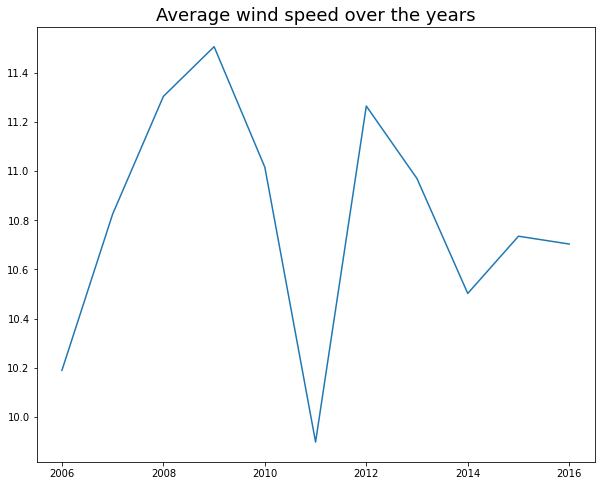

In [66]:
fig,ax=plt.subplots(figsize=(10,8))
plt.plot(avg_wind_Speed.index, avg_wind_Speed["Wind Speed (km/h)"])
plt.title("Average wind speed over the years", fontsize=18)

This shows that wind speed has been quite consistent over the years.

In [24]:
month_avg_wind_Speed=pd.DataFrame(df3.groupby("Month")["Wind Speed (km/h)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_wind_speed=month_avg_wind_Speed.reindex(index=order)
monthly_wind_speed

,Wind Speed (km/h)
Month,
January,11.512816
February,12.185543
March,13.405461
April,11.893094
May,10.959337
June,9.626471
July,9.639907
August,8.933431
September,9.621813


Text(0.5, 1.0, 'Monthly Average wind speed over the years')

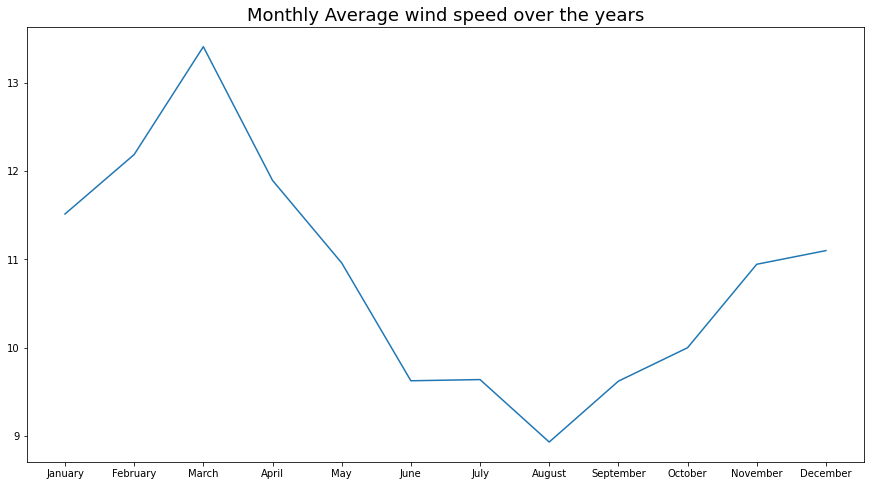

In [68]:
fig,ax=plt.subplots(figsize=(15,8))
plt.plot(monthly_wind_speed.index, monthly_wind_speed["Wind Speed (km/h)"])
plt.title("Monthly Average wind speed over the years", fontsize=18)

This shows that wind speed peaks during February and March and is minimum during the month of August.

In [29]:
df3["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [30]:
weather_cond=pd.DataFrame(df3.groupby("Year")["Summary"].describe(include="O").top)

weather_cond.rename(columns={"top":"most frequent weather"})

,most frequent weather
Year,
2006,Partly Cloudy
2007,Partly Cloudy
2008,Partly Cloudy
2009,Partly Cloudy
2010,Partly Cloudy
2011,Partly Cloudy
2012,Partly Cloudy
2013,Partly Cloudy
2014,Mostly Cloudy


This shows that `partly cloudy` has been the dominant weather throughout the decade.

In [31]:
m_weather_cond=pd.DataFrame(df3.groupby("Month")["Summary"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_weather_cond.rename(columns={"top":"most frequent weather"})
monthly=m_weather_cond.reindex(index=order)
monthly

,top
Month,
January,Overcast
February,Overcast
March,Mostly Cloudy
April,Partly Cloudy
May,Partly Cloudy
June,Partly Cloudy
July,Partly Cloudy
August,Partly Cloudy
September,Partly Cloudy


#Visibility

In [32]:
month_avg_visibility=pd.DataFrame(df3.groupby("Month")["Visibility (km)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_visibility=month_avg_visibility.reindex(index=order)
monthly_visibility

,Visibility (km)
Month,
January,7.830584
February,8.731368
March,10.910450
April,11.784224
May,11.892754
June,11.990266
July,12.187820
August,12.455549
September,11.602874


Text(0.5, 1.0, 'Monthly visibility over the years')

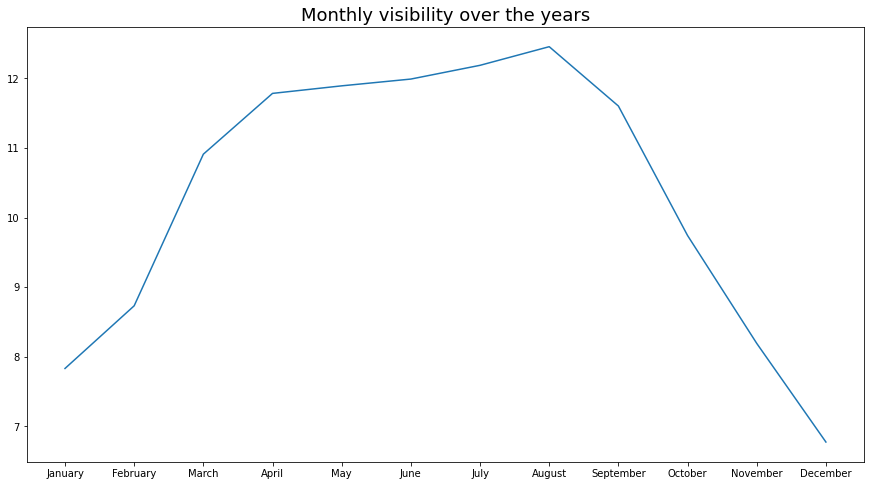

In [67]:
fig,ax=plt.subplots(figsize=(15,8))
plt.plot(monthly_visibility.index, monthly_visibility["Visibility (km)"])
plt.title("Monthly visibility over the years", fontsize=18)

This indicates that visibility peaks during the months of July and August and is at its least during the peak winter months of December and January.

In [37]:
percip=pd.DataFrame(df3.groupby("Month")["Precip Type"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_p=percip.rename(columns={"top":"Precip Type"})
monthly_percip=m_p.reindex(index=order)
monthly_percip

,Precip Type
Month,
January,rain
February,rain
March,rain
April,rain
May,rain
June,rain
July,rain
August,rain
September,rain


#Temperature

Text(0, 0.5, 'freq')

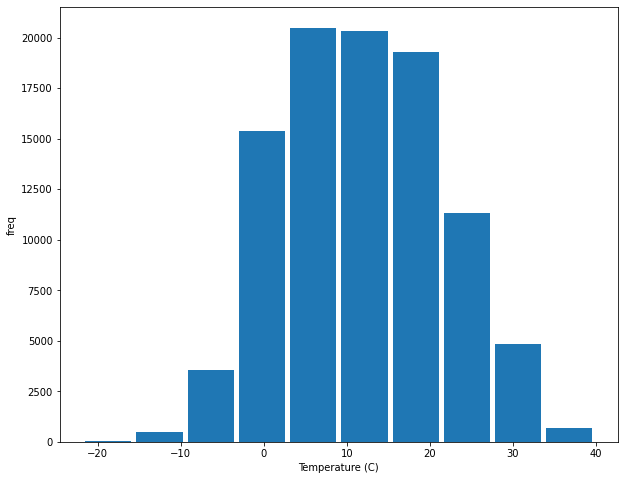

In [38]:
fig,ax=plt.subplots(figsize=(10,8))
plt.hist(df3["Temperature (C)"],bins=10,rwidth=0.9)
plt.xlabel("Temperature (C)")
plt.ylabel("freq")

In [39]:
year_avg_temp=pd.DataFrame(df3.groupby("Year")["Temperature (C)"].mean())
year_avg_temp

,Temperature (C)
Year,
2006,11.215365
2007,12.135239
2008,12.161876
2009,12.267910
2010,11.202061
2011,11.524453
2012,11.986726
2013,11.940719
2014,12.529737


This shows a slight increase in annual average temperature over the years, the least annual avg temperature was recorded in the early 3 years while the highest recorded annual tempertaure was recorded in the last 3 years.

Text(0.5, 1.0, 'Annual avg. temperature')

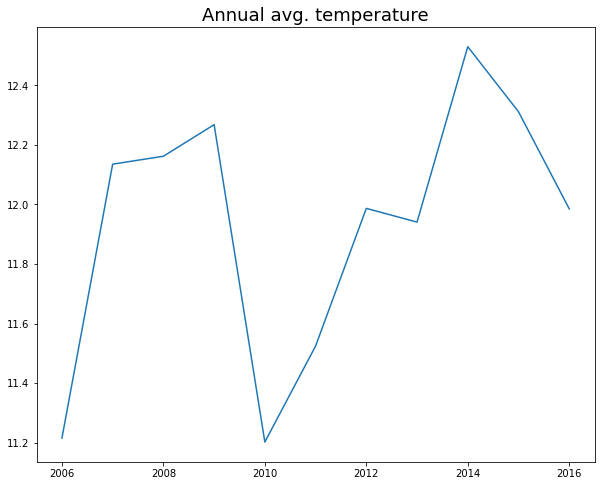

In [46]:
fig,ax=plt.subplots(figsize=(10,8))
plt.plot(year_avg_temp.index, year_avg_temp["Temperature (C)"])
plt.title("Annual avg. temperature", fontsize=18)

In [42]:
month_temp=pd.DataFrame(df3.groupby("Month")["Temperature (C)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]

monthly_avg_temp=month_temp.reindex(index=order)
monthly_avg_temp

,Temperature (C)
Month,
January,0.813890
February,2.159699
March,6.906599
April,12.756417
May,16.873692
June,20.715617
July,22.963943
August,22.345031
September,17.516790


Text(0.5, 1.0, 'Monthly Average temperature')

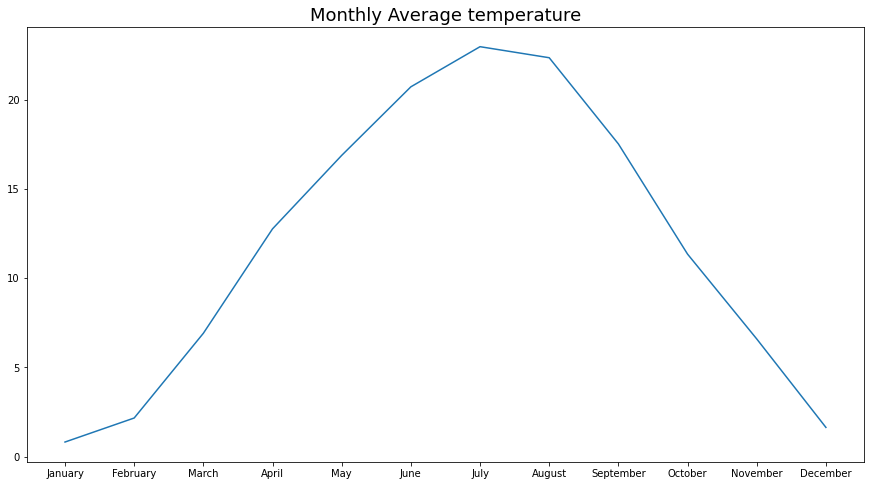

In [51]:
fig,ax=plt.subplots(figsize=(15,8))
plt.plot(monthly_avg_temp.index, monthly_avg_temp["Temperature (C)"])
plt.title("Monthly Average temperature", fontsize=18)

This shouldn't be a surprising stat, the average monhtly temperature peaks during the summers and is at its minimum during winters.

#Month-wise Plots

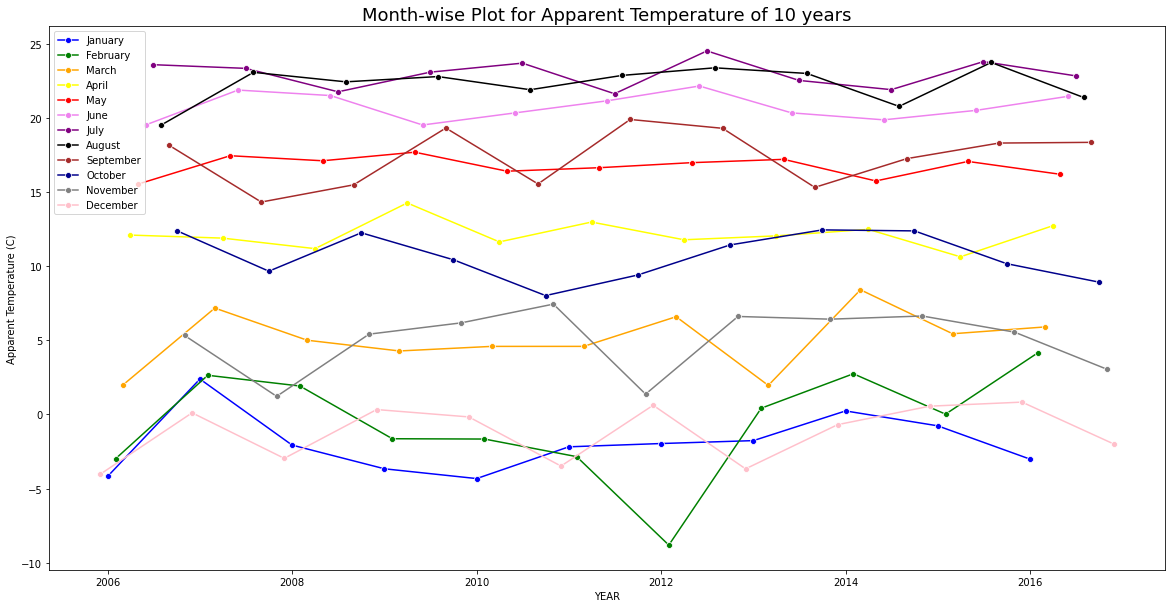

In [63]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

data = df.set_index("Formatted Date")
data

df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')

# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(20,10))
    plt.title(title, fontsize=18)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.savefig('plot10.png', dpi=300, bbox_inches='tight') 
    #plt.savefig('plot11.png', dpi=300, bbox_inches='tight')  
    plt.show()

# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

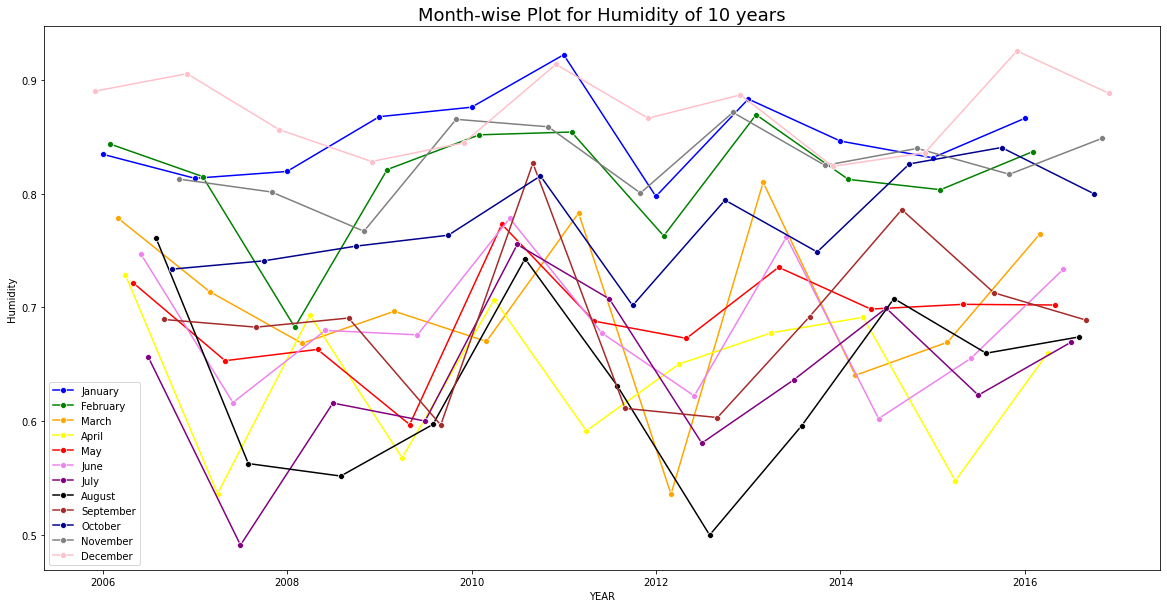

In [64]:
# Month-wise Plot for Humidity of 10 years 
title = 'Month-wise Plot for Humidity of 10 years' 
sns_plot(title, HUM_DATA)

#Humidity-Temp plots for each months.

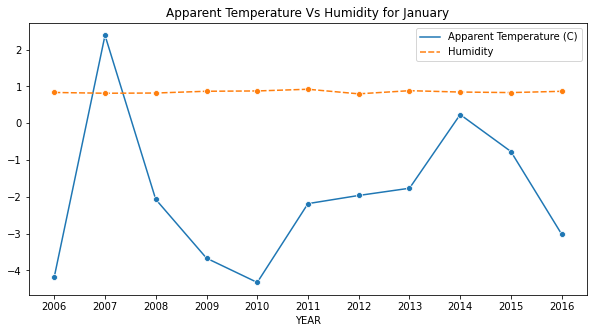

--------------------------------------------------------------------------------


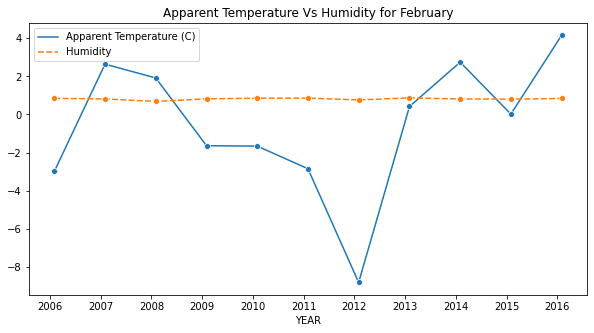

--------------------------------------------------------------------------------


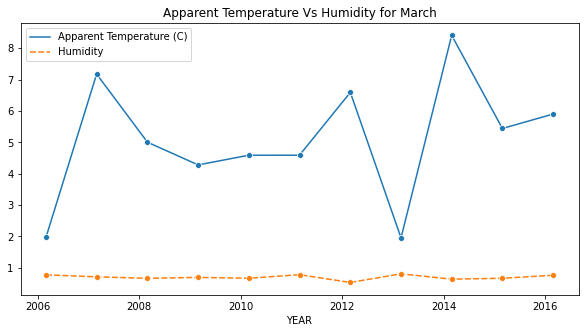

--------------------------------------------------------------------------------


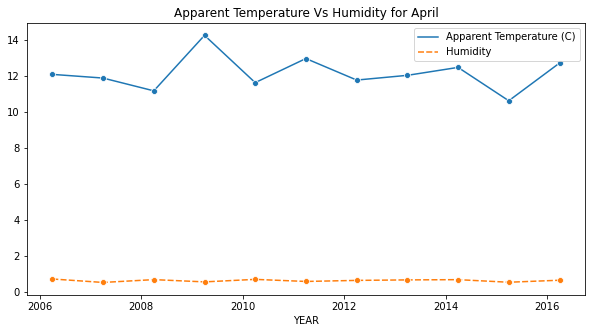

--------------------------------------------------------------------------------


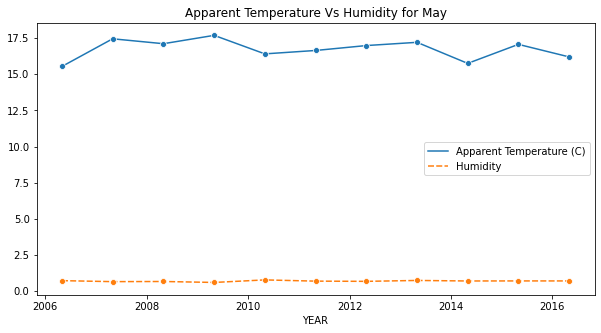

--------------------------------------------------------------------------------


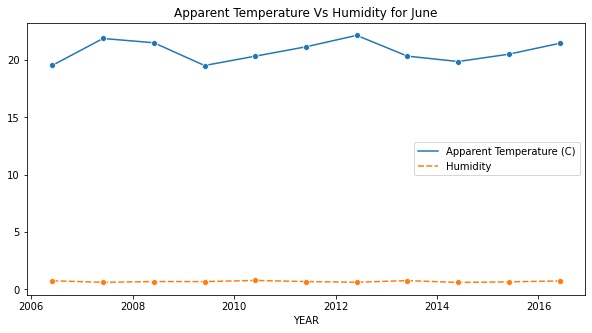

--------------------------------------------------------------------------------


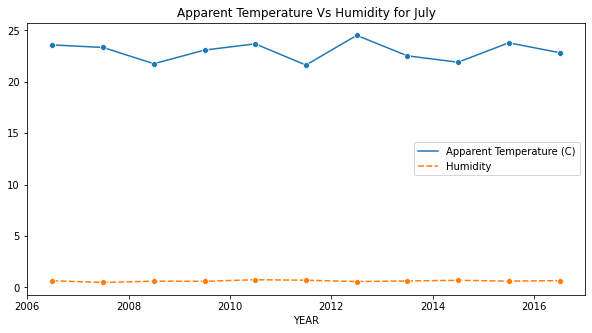

--------------------------------------------------------------------------------


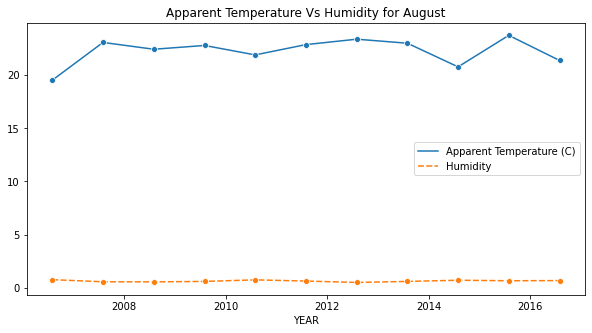

--------------------------------------------------------------------------------


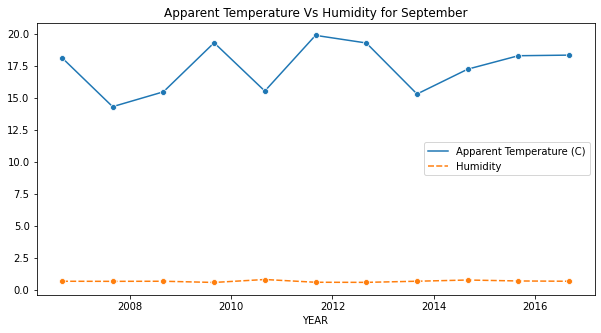

--------------------------------------------------------------------------------


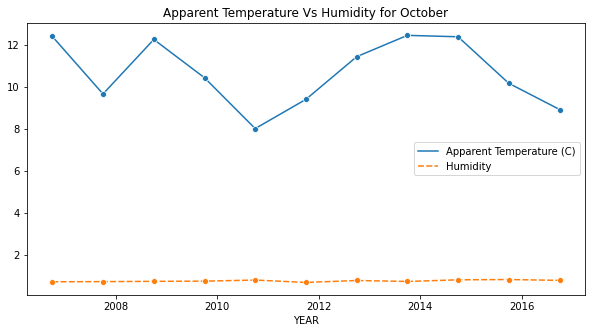

--------------------------------------------------------------------------------


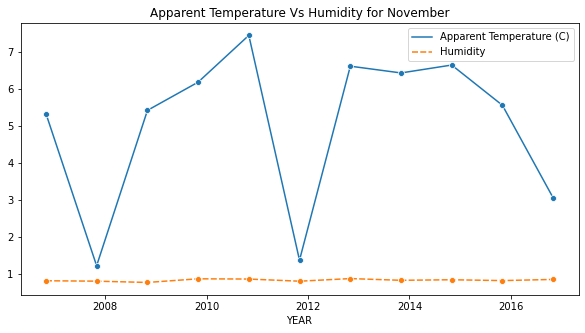

--------------------------------------------------------------------------------


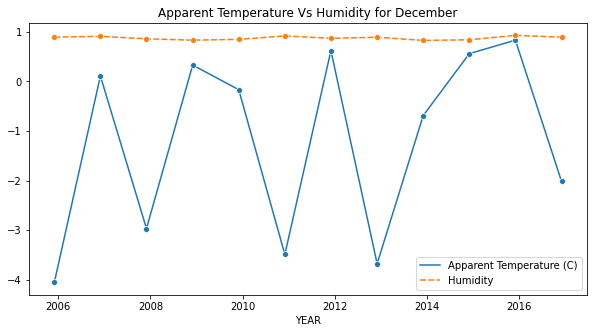

--------------------------------------------------------------------------------


In [65]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature Vs Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data, marker='o')
    name="month"+str(month)+".png"
    plt.savefig(name, dpi=300, bbox_inches='tight')  
    plt.show()
    print('-'*80)

# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

**Its evident that humidity has been consistent over the years but there has been a slight, gradual increase in the temperature.**